# Food Delivery Application Dataset
## Exploratory Data Analysis and  User Segmentation

### By Maral Hamedian



## Introduction

In this assignment the aim is to create a user segmentation for getting some insight of type of users of a service. After researching for a while it was found out that one of the best strategies for segmenting the customers is by running an RFM analysis. 
RFM stands for Recency, Frequency and and Monetary, and by running this kind of segmentation most and least valuable and loyal customers  can be found. This could benefit the company in boosting marketing strategies, utilize promotional activities and as a result increase sales. 

## Data Exploration

Load the nessary packages and the data

In [1]:
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("dataset_for_analyst_assignment_20201120.csv")
df.head()

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,...,WEB_PURCHASES,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE
0,2019-09-01 00:00:00.000,DNK,0,NaN,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
1,2019-09-01 00:00:00.000,FIN,1,1.0,0.0,2020-09-02 00:00:00.000,2020-09-02 00:00:00.000,2,0.0,1.0,...,0.0,1.0,NaN,False,23.0,2.0,NaN,NaN,6.853,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
2,2019-09-01 00:00:00.000,DNK,19,19.0,0.0,2019-12-10 00:00:00.000,2020-05-25 00:00:00.000,3,0.0,4.0,...,19.0,0.0,NaN,True,21.0,2.0,9.0,3.0,6.559,"{\n ""General merchandise"": 1,\n ""Grocery"": 9..."
3,2019-09-01 00:00:00.000,FIN,0,NaN,NaN,NaN,NaN,4,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
4,2019-09-01 00:00:00.000,GRC,0,NaN,NaN,NaN,NaN,5,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."


Let's find out what columns and datatypes do we have

In [3]:
df.dtypes

REGISTRATION_DATE                           object
REGISTRATION_COUNTRY                        object
PURCHASE_COUNT                               int64
PURCHASE_COUNT_DELIVERY                    float64
PURCHASE_COUNT_TAKEAWAY                    float64
FIRST_PURCHASE_DAY                          object
LAST_PURCHASE_DAY                           object
USER_ID                                      int64
BREAKFAST_PURCHASES                        float64
LUNCH_PURCHASES                            float64
EVENING_PURCHASES                          float64
DINNER_PURCHASES                           float64
LATE_NIGHT_PURCHASES                       float64
TOTAL_PURCHASES_EUR                        float64
DISTINCT_PURCHASE_VENUE_COUNT              float64
MIN_PURCHASE_VALUE_EUR                     float64
MAX_PURCHASE_VALUE_EUR                     float64
AVG_PURCHASE_VALUE_EUR                     float64
PREFERRED_DEVICE                            object
IOS_PURCHASES                  

In [4]:
df.describe()

,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,DINNER_PURCHASES,LATE_NIGHT_PURCHASES,TOTAL_PURCHASES_EUR,...,MAX_PURCHASE_VALUE_EUR,AVG_PURCHASE_VALUE_EUR,IOS_PURCHASES,WEB_PURCHASES,ANDROID_PURCHASES,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS
count,21983.000000,12028.000000,12028.000000,21983.00000,12028.000000,12028.000000,12028.000000,12028.000000,12028.0,12028.000000,...,12028.000000,12028.000000,12028.000000,12028.000000,12028.000000,12028.000000,12028.000000,7832.000000,7832.000000,12028.000000
mean,3.345358,5.741686,0.372464,10992.00000,0.193964,2.375042,0.493432,3.029016,0.0,176.210419,...,42.068043,31.195060,2.900482,1.056535,2.157133,11.501995,4.010392,64.293539,55.792135,5.961218
std,8.523171,10.536220,1.416310,6346.08982,1.104067,5.626178,1.827710,5.238209,0.0,299.086986,...,41.176221,20.716542,7.456288,4.776431,6.876314,6.930837,2.010071,72.570103,74.963336,3.466263
min,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.0,1.012000,...,1.016000,1.012000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.002000
25%,0.000000,1.000000,0.000000,5496.50000,0.000000,0.000000,0.000000,0.000000,0.0,32.384000,...,23.368000,19.228000,0.000000,0.000000,0.000000,5.000000,2.000000,18.000000,10.000000,2.950500
50%,1.000000,2.000000,0.000000,10992.00000,0.000000,1.000000,0.000000,1.000000,0.0,75.900000,...,35.560000,27.324000,0.000000,0.000000,0.000000,11.500000,4.000000,39.500000,25.000000,5.928000
75%,3.000000,6.000000,0.000000,16487.50000,0.000000,2.000000,0.000000,3.000000,0.0,196.328000,...,51.816000,38.456000,2.000000,1.000000,1.000000,18.000000,6.000000,81.000000,68.250000,8.978000
max,320.000000,320.000000,44.000000,21983.00000,52.000000,171.000000,71.000000,104.000000,0.0,7979.620000,...,3048.000000,657.800000,200.000000,196.000000,221.000000,23.000000,7.000000,421.000000,421.000000,11.999000


In [5]:
print(df.shape)

(21983, 30)


In [6]:
# make sure that none of the users is repeated more than once
df.USER_ID.unique().shape[0] 

21983

In [7]:
### Let's also check if the First purchase is greater than the last purchase - this should return false
any(df['FIRST_PURCHASE_DAY'] > df['LAST_PURCHASE_DAY'])

False

## Data Preprocessing



Convert features to suitable types

In [8]:
#convert all date and time columns from object type to datetime64[ns]
df["REGISTRATION_DATE"] = df["REGISTRATION_DATE"].astype('datetime64[ns]')
df["FIRST_PURCHASE_DAY"] = df["FIRST_PURCHASE_DAY"].astype('datetime64[ns]')
df["LAST_PURCHASE_DAY"] = df["LAST_PURCHASE_DAY"].astype('datetime64[ns]')

#convert purchase count from object ype to int64
df["PURCHASE_COUNT"] = df["PURCHASE_COUNT"].astype('int64')

#### Missing Values

In [9]:
#See the amount of missing values in each feature
df.isnull().sum(axis=0)

REGISTRATION_DATE                              0
REGISTRATION_COUNTRY                           0
PURCHASE_COUNT                                 0
PURCHASE_COUNT_DELIVERY                     9955
PURCHASE_COUNT_TAKEAWAY                     9955
FIRST_PURCHASE_DAY                         10019
LAST_PURCHASE_DAY                           9956
USER_ID                                        0
BREAKFAST_PURCHASES                         9955
LUNCH_PURCHASES                             9955
EVENING_PURCHASES                           9955
DINNER_PURCHASES                            9955
LATE_NIGHT_PURCHASES                        9955
TOTAL_PURCHASES_EUR                         9955
DISTINCT_PURCHASE_VENUE_COUNT               9955
MIN_PURCHASE_VALUE_EUR                      9955
MAX_PURCHASE_VALUE_EUR                      9955
AVG_PURCHASE_VALUE_EUR                      9955
PREFERRED_DEVICE                              73
IOS_PURCHASES                               9955
WEB_PURCHASES       

In [10]:
len(df[(df.PURCHASE_COUNT == 0)])

9955

As it can be seen, in most of the features, the missing value equals to 9955,and with little inspection it is found out that this value corresponds to the number of users that have not made any purchases after registration (purchase count = 0). this is proven by printing out a condition where purchase count is 0 and any other attribute that has 9955 missing values, as shown below.

In [11]:
df[(df.PURCHASE_COUNT == 0) & (df.TOTAL_PURCHASES_EUR.isnull())]

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,...,WEB_PURCHASES,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE
0,2019-09-01,DNK,0,NaN,NaN,NaT,NaT,1,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
3,2019-09-01,FIN,0,NaN,NaN,NaT,NaT,4,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
4,2019-09-01,GRC,0,NaN,NaN,NaT,NaT,5,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
5,2019-09-01,FIN,0,NaN,NaN,NaT,NaT,6,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
6,2019-09-01,DNK,0,NaN,NaN,NaT,NaT,7,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21974,2019-09-30,GRC,0,NaN,NaN,NaT,NaT,21975,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
21977,2019-09-30,GRC,0,NaN,NaN,NaT,NaT,21978,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
21979,2019-09-30,GRC,0,NaN,NaN,NaT,NaT,21980,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
21980,2019-09-30,DNK,0,NaN,NaN,NaT,NaT,21981,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."


we can also see some features of higher values that are missing.
Let's explore why more than 9555 values are missing from First purchase day and last purchase day.

In [12]:
# customers who has made purchases but there is no first purchase date
df[(df.PURCHASE_COUNT > 0) & (df.FIRST_PURCHASE_DAY.isnull())]

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,...,WEB_PURCHASES,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE
151,2019-09-01,DNK,3,3.0,0.0,NaT,2020-08-18,152,1.0,2.0,...,0.0,3.0,NaN,False,16.0,4.0,22.0,22.0,6.520,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
193,2019-09-01,FIN,1,1.0,0.0,NaT,2019-09-01,194,0.0,0.0,...,0.0,1.0,NaN,False,20.0,7.0,NaN,NaN,10.284,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
400,2019-09-01,DNK,3,3.0,0.0,NaT,2019-10-04,401,0.0,2.0,...,0.0,3.0,NaN,False,23.0,2.0,26.0,26.0,8.635,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
552,2019-09-01,DNK,3,3.0,0.0,NaT,2020-04-25,553,0.0,0.0,...,0.0,3.0,NaN,True,4.0,5.0,0.0,0.0,0.041,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
555,2019-09-01,FIN,2,2.0,0.0,NaT,2020-08-28,556,0.0,0.0,...,2.0,0.0,"[\n ""american"",\n ""italian""\n]",True,18.0,7.0,59.0,59.0,0.536,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20978,2019-09-29,FIN,1,1.0,0.0,NaT,NaT,20979,0.0,1.0,...,0.0,0.0,NaN,False,3.0,6.0,NaN,NaN,5.087,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
21094,2019-09-29,DNK,3,3.0,0.0,NaT,2020-07-23,21095,0.0,1.0,...,3.0,0.0,NaN,True,3.0,1.0,26.0,26.0,7.601,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
21214,2019-09-29,DNK,13,12.0,1.0,NaT,2020-10-20,21215,0.0,4.0,...,8.0,0.0,"[\n ""mexican""\n]",True,8.0,6.0,33.0,12.0,1.287,"{\n ""General merchandise"": 1,\n ""Grocery"": 6..."
21384,2019-09-29,DNK,1,1.0,0.0,NaT,2019-09-29,21385,0.0,0.0,...,0.0,0.0,"[\n ""italian""\n]",False,20.0,1.0,NaN,NaN,1.441,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."


In [13]:
df[(df.PURCHASE_COUNT != 0) & (df.LAST_PURCHASE_DAY.isnull())]

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,...,WEB_PURCHASES,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE
20978,2019-09-29,FIN,1,1.0,0.0,NaT,NaT,20979,0.0,1.0,...,0.0,0.0,NaN,False,3.0,6.0,NaN,NaN,5.087,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."


Average days between purchases and median days between purchases have missing values even if purchase count is greater than 0. It makes sense if among those are customers that ordered one time.

In [14]:
df[(df.PURCHASE_COUNT ==1)& (df.AVG_DAYS_BETWEEN_PURCHASES.isnull())]

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,...,WEB_PURCHASES,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE
1,2019-09-01,FIN,1,1.0,0.0,2020-09-02,2020-09-02,2,0.0,1.0,...,0.0,1.0,NaN,False,23.0,2.0,NaN,NaN,6.853,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
7,2019-09-01,FIN,1,1.0,0.0,2020-10-14,2020-10-14,8,0.0,0.0,...,0.0,1.0,NaN,True,5.0,1.0,NaN,NaN,1.251,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
22,2019-09-01,FIN,1,1.0,0.0,2020-10-24,2020-10-24,23,0.0,0.0,...,0.0,0.0,NaN,True,7.0,5.0,NaN,NaN,9.408,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
24,2019-09-01,FIN,1,1.0,0.0,2020-10-06,2020-10-06,25,0.0,0.0,...,0.0,0.0,NaN,False,10.0,5.0,NaN,NaN,7.322,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
37,2019-09-01,FIN,1,1.0,0.0,2020-10-17,2020-10-17,38,0.0,1.0,...,0.0,0.0,NaN,True,6.0,5.0,NaN,NaN,7.431,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21970,2019-09-30,DNK,1,1.0,0.0,2019-10-13,2019-10-13,21971,0.0,0.0,...,0.0,0.0,NaN,False,23.0,2.0,NaN,NaN,3.916,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
21973,2019-09-30,FIN,1,1.0,0.0,2020-10-15,2020-10-15,21974,0.0,0.0,...,0.0,1.0,NaN,False,19.0,6.0,NaN,NaN,4.045,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
21976,2019-09-30,DNK,1,1.0,0.0,2019-10-03,2019-10-03,21977,0.0,0.0,...,0.0,1.0,NaN,False,22.0,1.0,NaN,NaN,2.365,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
21978,2019-09-30,GRC,1,1.0,0.0,2020-01-23,2020-01-23,21979,0.0,0.0,...,0.0,1.0,NaN,False,12.0,2.0,NaN,NaN,1.383,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."


Let's check if there are rows with purchase count greater than 1 and see if any of those have missing values of average and median days between purchases.

In [15]:
df[(df.PURCHASE_COUNT > 1)& (df.AVG_DAYS_BETWEEN_PURCHASES.isnull())]

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,...,WEB_PURCHASES,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE
707,2019-09-01,DNK,2,2.0,0.0,NaT,2020-02-08,708,0.0,1.0,...,0.0,2.0,NaN,True,19.0,4.0,NaN,NaN,4.043,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
1724,2019-09-03,DNK,2,2.0,0.0,NaT,2019-11-28,1725,0.0,0.0,...,0.0,0.0,"[\n ""indian""\n]",False,16.0,3.0,NaN,NaN,10.118,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
1991,2019-09-04,DNK,2,2.0,0.0,NaT,2020-09-27,1992,0.0,0.0,...,0.0,2.0,NaN,False,18.0,1.0,NaN,NaN,4.521,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
5769,2019-09-08,DNK,2,2.0,0.0,2019-09-08,2019-11-24,5770,0.0,1.0,...,0.0,0.0,"[\n ""italian""\n]",False,9.0,1.0,NaN,NaN,10.554,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
7108,2019-09-10,DNK,2,2.0,0.0,2019-09-10,2019-10-07,7109,0.0,0.0,...,2.0,0.0,NaN,True,15.0,1.0,NaN,NaN,3.615,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
7717,2019-09-11,DNK,2,2.0,0.0,NaT,2019-10-02,7718,0.0,0.0,...,2.0,0.0,NaN,True,11.0,6.0,NaN,NaN,4.125,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
8164,2019-09-12,DNK,2,2.0,0.0,2019-10-07,2020-10-11,8165,0.0,1.0,...,0.0,0.0,NaN,False,0.0,7.0,NaN,NaN,5.264,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
8581,2019-09-13,DNK,2,2.0,0.0,NaT,2019-09-20,8582,0.0,2.0,...,0.0,0.0,NaN,False,12.0,6.0,NaN,NaN,8.097,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
9216,2019-09-14,GRC,2,2.0,0.0,2019-09-20,2020-09-14,9217,0.0,0.0,...,0.0,2.0,NaN,True,5.0,4.0,NaN,NaN,2.998,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
9616,2019-09-14,DNK,2,2.0,0.0,2019-09-14,2019-10-12,9617,0.0,1.0,...,0.0,0.0,NaN,False,5.0,2.0,NaN,NaN,6.060,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."


Seems that there are 17 users with missing values of average and median days between purchases,eventhough they have made purchases twice.

#### let's handle some of the missing values now

Delete the following rows:
- purchase count > 0 but first and last purchase days are missing
- purchase count > 1 but average and median days between purchases are missing

In [16]:
df.drop(df.index[(df.PURCHASE_COUNT > 0) & (df.FIRST_PURCHASE_DAY.isnull())], inplace= True)
df.drop(df.index[(df.PURCHASE_COUNT > 0) & (df.LAST_PURCHASE_DAY.isnull())], inplace= True)

In [17]:
df.drop(df.index[(df.PURCHASE_COUNT > 1)& (df.AVG_DAYS_BETWEEN_PURCHASES.isnull())], inplace= True)
df.drop(df.index[(df.PURCHASE_COUNT > 1)& (df.MEDIAN_DAYS_BETWEEN_PURCHASES.isnull())], inplace= True)

for all the remaining rows that have missing values on Average and median days between purchases, substitute 0 ( Nan -> 0.0).

In [18]:
### Replacing 'Nan' values in AVG_DAYS_BETWEEN_PURCHASES with 0
df['AVG_DAYS_BETWEEN_PURCHASES'][df['AVG_DAYS_BETWEEN_PURCHASES'].isnull()] = 0.0
### Replacing 'Nan' values in MEDIAN_DAYS_BETWEEN_PURCHASES with 0
df['MEDIAN_DAYS_BETWEEN_PURCHASES'][df['MEDIAN_DAYS_BETWEEN_PURCHASES'].isnull()] = 0.0


Do we have any rows with purchase count greater than 1, but average and median days between purchases equal to 0? Errors, they should be removed

In [19]:
df[(df.PURCHASE_COUNT > 1)& (df.AVG_DAYS_BETWEEN_PURCHASES == 0.0)]

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,...,WEB_PURCHASES,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE
269,2019-09-01,GRC,2,2.0,0.0,2019-09-01,2019-09-01,270,0.0,2.0,...,0.0,2.0,NaN,False,10.0,2.0,0.0,0.0,3.436,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
282,2019-09-01,DNK,2,2.0,0.0,2019-09-01,2019-09-01,283,0.0,1.0,...,0.0,0.0,NaN,False,21.0,3.0,0.0,0.0,9.063,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
529,2019-09-01,DNK,2,1.0,1.0,2019-09-01,2019-09-01,530,0.0,0.0,...,0.0,2.0,NaN,False,1.0,4.0,0.0,0.0,8.564,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
1214,2019-09-02,DNK,2,2.0,0.0,2020-08-12,2020-08-12,1215,0.0,0.0,...,0.0,0.0,NaN,False,16.0,5.0,0.0,0.0,6.540,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
1694,2019-09-03,DNK,2,2.0,0.0,2019-09-03,2019-09-03,1695,0.0,0.0,...,0.0,0.0,"[\n ""japanese""\n]",False,10.0,2.0,0.0,0.0,1.909,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19111,2019-09-27,GRC,2,2.0,0.0,2019-09-27,2019-09-27,19112,0.0,2.0,...,0.0,2.0,NaN,False,20.0,5.0,0.0,0.0,9.824,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
19437,2019-09-27,DNK,2,2.0,0.0,2019-09-27,2019-09-27,19438,0.0,0.0,...,0.0,0.0,NaN,True,0.0,6.0,0.0,0.0,8.349,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
19925,2019-09-28,FIN,2,2.0,0.0,2020-04-16,2020-04-16,19926,1.0,0.0,...,0.0,2.0,NaN,True,20.0,6.0,0.0,0.0,1.697,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
20247,2019-09-28,FIN,2,1.0,1.0,2019-09-28,2019-09-28,20248,0.0,0.0,...,0.0,2.0,NaN,False,16.0,7.0,0.0,0.0,0.616,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."


In [20]:
df.drop(df.index[(df.PURCHASE_COUNT > 1)& (df.AVG_DAYS_BETWEEN_PURCHASES == 0.0)], inplace= True)

In [21]:
df[(df.PURCHASE_COUNT > 1)& (df.MEDIAN_DAYS_BETWEEN_PURCHASES == 0.0)]

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,...,WEB_PURCHASES,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE
2101,2019-09-04,FIN,18,13.0,5.0,2019-09-05,2019-11-30,2102,2.0,11.0,...,0.0,0.0,"[\n ""mexican"",\n ""italian"",\n ""american""\n]",True,2.0,6.0,5.0,0.0,0.333,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
4072,2019-09-06,GRC,176,176.0,0.0,2020-06-01,2020-10-04,4073,26.0,68.0,...,0.0,0.0,NaN,True,20.0,1.0,1.0,0.0,0.369,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
9185,2019-09-13,FIN,18,16.0,2.0,2020-02-27,2020-10-21,9186,6.0,11.0,...,17.0,1.0,"[\n ""italian""\n]",True,13.0,6.0,14.0,0.0,5.668,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
11225,2019-09-16,DNK,10,0.0,10.0,2019-10-11,2019-10-15,11226,0.0,8.0,...,0.0,0.0,NaN,True,13.0,6.0,1.0,0.0,2.158,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
16922,2019-09-23,GRC,4,4.0,0.0,2020-08-17,2020-08-22,16923,0.0,3.0,...,0.0,0.0,NaN,True,21.0,6.0,2.0,0.0,11.794,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
21702,2019-09-30,FIN,14,10.0,4.0,2019-10-28,2020-08-04,21703,1.0,8.0,...,0.0,14.0,"[\n ""american""\n]",False,4.0,2.0,22.0,0.0,2.272,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."


In [22]:
df.drop(df.index[(df.PURCHASE_COUNT > 1)& (df.MEDIAN_DAYS_BETWEEN_PURCHASES == 0.0)], inplace= True)

In [23]:
#confirm
print('# of 0 average days between purchases when purchase count > 1: '+ str(len(df[(df.PURCHASE_COUNT > 1)& (df.AVG_DAYS_BETWEEN_PURCHASES == 0.0)])))
print('# of 0 Median days between purchases when purchase count > 1: '+ str(len(df[(df.PURCHASE_COUNT > 1)& (df.MEDIAN_DAYS_BETWEEN_PURCHASES == 0.0)])))

# of 0 average days between purchases when purchase count > 1: 0
# of 0 Median days between purchases when purchase count > 1: 0


since purchase count is 0 when 9955 values of missing from different features, we substitute the missing values with 0. This action will take place in the following feature columns:
- PURCHASE_COUNT_DELIVERY
- PURCHASE_COUNT_TAKEAWAY
- BREAKFAST_PURCHASES
- LUNCH_PURCHASES
- EVENING_PURCHASES
- DINNER_PURCHASES
- LATE_NIGHT_PURCHASES
- TOTAL_PURCHASES_EUR
- DISTINCT_PURCHASE_VENUE_COUNT
- MIN_PURCHASE_VALUE_EUR
- MAX_PURCHASE_VALUE_EUR
- AVG_PURCHASE_VALUE_EUR
- IOS_PURCHASES
- WEB_PURCHASES
- ANDROID_PURCHASES
- MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE
- MOST_COMMON_WEEKDAY_TO_PURCHASE
- AVERAGE_DELIVERY_DISTANCE_KMS 

In [24]:
df['PURCHASE_COUNT_DELIVERY'][(df['PURCHASE_COUNT'] == 0) & (df['PURCHASE_COUNT_DELIVERY'].isnull()) ] = 0.0
df['PURCHASE_COUNT_TAKEAWAY'][(df['PURCHASE_COUNT'] == 0) & (df['PURCHASE_COUNT_TAKEAWAY'].isnull()) ] = 0.0
df['BREAKFAST_PURCHASES'][(df['PURCHASE_COUNT'] == 0) & (df['BREAKFAST_PURCHASES'].isnull()) ] = 0.0
df['LUNCH_PURCHASES'][(df['PURCHASE_COUNT'] == 0) & (df['LUNCH_PURCHASES'].isnull()) ] = 0.0
df['EVENING_PURCHASES'][(df['PURCHASE_COUNT'] == 0) & (df['EVENING_PURCHASES'].isnull()) ] = 0.0
df['DINNER_PURCHASES'][(df['PURCHASE_COUNT'] == 0) & (df['DINNER_PURCHASES'].isnull()) ] = 0.0
df['LATE_NIGHT_PURCHASES'][(df['PURCHASE_COUNT'] == 0) & (df['LATE_NIGHT_PURCHASES'].isnull()) ] = 0.0
df['TOTAL_PURCHASES_EUR'][(df['PURCHASE_COUNT'] == 0) & (df['TOTAL_PURCHASES_EUR'].isnull()) ] = 0.0
df['DISTINCT_PURCHASE_VENUE_COUNT'][(df['PURCHASE_COUNT'] == 0) & (df['DISTINCT_PURCHASE_VENUE_COUNT'].isnull()) ] = 0.0
df['MIN_PURCHASE_VALUE_EUR'][(df['PURCHASE_COUNT'] == 0) & (df['MIN_PURCHASE_VALUE_EUR'].isnull()) ] = 0.0
df['MAX_PURCHASE_VALUE_EUR'][(df['PURCHASE_COUNT'] == 0) & (df['MAX_PURCHASE_VALUE_EUR'].isnull()) ] = 0.0
df['AVG_PURCHASE_VALUE_EUR'][(df['PURCHASE_COUNT'] == 0) & (df['AVG_PURCHASE_VALUE_EUR'].isnull()) ] = 0.0
df['IOS_PURCHASES'][(df['PURCHASE_COUNT'] == 0) & (df['IOS_PURCHASES'].isnull()) ] = 0.0
df['WEB_PURCHASES'][(df['PURCHASE_COUNT'] == 0) & (df['WEB_PURCHASES'].isnull()) ] = 0.0
df['ANDROID_PURCHASES'][(df['PURCHASE_COUNT'] == 0) & (df['ANDROID_PURCHASES'].isnull()) ] = 0.0
df['MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE'][(df['PURCHASE_COUNT'] == 0) & (df['MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE'].isnull()) ] = 0.0
df['MOST_COMMON_WEEKDAY_TO_PURCHASE'][(df['PURCHASE_COUNT'] == 0) & (df['MOST_COMMON_WEEKDAY_TO_PURCHASE'].isnull()) ] = 0.0
df['AVERAGE_DELIVERY_DISTANCE_KMS'][(df['PURCHASE_COUNT'] == 0) & (df['AVERAGE_DELIVERY_DISTANCE_KMS'].isnull()) ] = 0.0

###### Handle Missing values on First purchase day and Last purchase day

It is important to also treat the missing dates in first and last purchases. AS we said before these values are missing because the customers have not made any purchases, so their purchase count is 0. One way to treat them is to set it to the time that has not occured yet, e.g. 21th March, 2025. 

Before we change the non existing date values, let's save the most recent last purchase day into a variable. we are going to need it later.

In [25]:
Latest_purchase_day = df.LAST_PURCHASE_DAY.max()
Latest_purchase_day

Timestamp('2020-10-31 00:00:00')

In [26]:
#set the non existing first and last purchase days to 21th March, 2025.
df['FIRST_PURCHASE_DAY'][(df['PURCHASE_COUNT'] == 0) & (df['FIRST_PURCHASE_DAY'].isnull()) ] = pd.to_datetime('2025-03-21 00:00:00')
df['LAST_PURCHASE_DAY'][(df['PURCHASE_COUNT'] == 0) & (df['LAST_PURCHASE_DAY'].isnull()) ] = pd.to_datetime('2025-03-21 00:00:00')

In [27]:
# confirm the correct data types of first and last purchase day 
df['FIRST_PURCHASE_DAY'].dtypes

dtype('<M8[ns]')

In [28]:
#confirm that the most recent last purchase day is now 21th March, 2025
print('Latest Last purchase day: '+ str(df.LAST_PURCHASE_DAY.max()))

Latest Last purchase day: 2025-03-21 00:00:00


In [29]:
#Reset index rows of the dataset 
df.reset_index(drop=True, inplace=True)

There are other missing values as shown below, but we are not going to use those in our segmentation analysis... so let's skip dealing with those

#### some more exploration
Let's see if we find any correlation between our features

In [30]:
df.corr()

,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,DINNER_PURCHASES,LATE_NIGHT_PURCHASES,TOTAL_PURCHASES_EUR,...,AVG_PURCHASE_VALUE_EUR,IOS_PURCHASES,WEB_PURCHASES,ANDROID_PURCHASES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS
PURCHASE_COUNT,1.000000,0.992290,0.270900,0.003732,0.459978,0.886301,0.516019,0.853717,NaN,0.894808,...,0.221162,0.636007,0.479758,0.612322,0.274512,0.267796,0.287727,0.061365,0.025393,0.263942
PURCHASE_COUNT_DELIVERY,0.992290,1.000000,0.149504,0.003788,0.457397,0.883119,0.520231,0.840428,NaN,0.884006,...,0.211637,0.626352,0.480514,0.609641,0.269764,0.257231,0.276867,0.055439,0.021016,0.253589
PURCHASE_COUNT_TAKEAWAY,0.270900,0.149504,1.000000,0.000360,0.117105,0.211732,0.076175,0.283358,NaN,0.272712,...,0.120643,0.209200,0.095366,0.150031,0.094809,0.138563,0.145056,0.058973,0.039350,0.136102
USER_ID,0.003732,0.003788,0.000360,1.000000,-0.005758,0.003206,0.007033,0.002666,NaN,0.008349,...,0.015849,-0.004591,0.005012,0.007548,0.011274,0.009602,0.010822,0.014083,0.013818,0.009237
BREAKFAST_PURCHASES,0.459978,0.457397,0.117105,-0.005758,1.000000,0.480331,0.177413,0.184248,NaN,0.311950,...,0.057056,0.241460,0.302770,0.280120,0.112033,0.081064,0.103440,0.011582,-0.001107,0.086138
LUNCH_PURCHASES,0.886301,0.883119,0.211732,0.003206,0.480331,1.000000,0.323406,0.564801,NaN,0.742132,...,0.144332,0.519635,0.452041,0.571555,0.221696,0.205982,0.221646,0.035205,0.007830,0.203256
EVENING_PURCHASES,0.516019,0.520231,0.076175,0.007033,0.177413,0.323406,1.000000,0.347536,NaN,0.344724,...,0.047475,0.351304,0.212269,0.315399,0.156137,0.127124,0.140567,0.019734,0.002078,0.133877
DINNER_PURCHASES,0.853717,0.840428,0.283358,0.002666,0.184248,0.564801,0.347536,1.000000,NaN,0.874610,...,0.272986,0.591559,0.378066,0.492248,0.253978,0.272491,0.287857,0.079291,0.042921,0.264153
LATE_NIGHT_PURCHASES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TOTAL_PURCHASES_EUR,0.894808,0.884006,0.272712,0.008349,0.311950,0.742132,0.344724,0.874610,NaN,1.000000,...,0.374336,0.597397,0.433548,0.514634,0.279992,0.288492,0.300315,0.088852,0.050500,0.279410


Let's narrow it down

In [31]:
#correlation of purchase count, total purchases, average purchase values, most common weekday to purchase and average deliveyr distnace
df.iloc[:, [2, 13,17,28]].corr()

,PURCHASE_COUNT,TOTAL_PURCHASES_EUR,AVG_PURCHASE_VALUE_EUR,AVERAGE_DELIVERY_DISTANCE_KMS
PURCHASE_COUNT,1.000000,0.894808,0.221162,0.263942
TOTAL_PURCHASES_EUR,0.894808,1.000000,0.374336,0.279410
AVG_PURCHASE_VALUE_EUR,0.221162,0.374336,1.000000,0.567606
AVERAGE_DELIVERY_DISTANCE_KMS,0.263942,0.279410,0.567606,1.000000


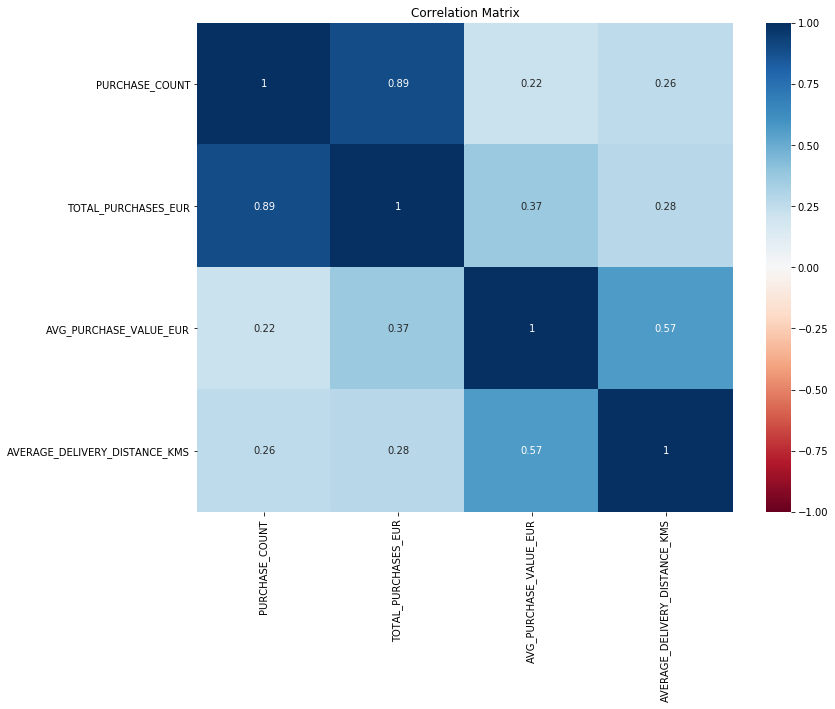

In [32]:
plt.figure(figsize=(12, 9))
s = sns.heatmap(df.iloc[:, [2, 13,17,28]].corr(),
                annot=True,
                cmap='RdBu',
                vmin=-1,
                vmax=1)
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.title('Correlation Matrix')
plt.show()

It seem that there is a high positive correlation between purchase count and total purcahses in terms of money.
Also, it seems that there is a strong correlation between average delivery distance and average purchase value.
Let's see at what distances from resturants most of the users are.
Note: customers whose purchase count is 0 are excluded from this as we want to see the true value of distances to the resturants. 

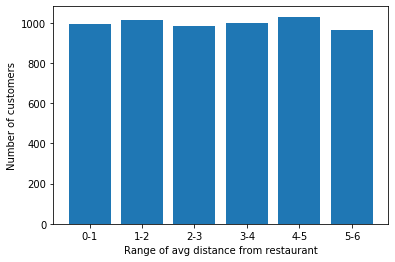

In [33]:
n_cust_dist = [len(df.USER_ID[(df.AVERAGE_DELIVERY_DISTANCE_KMS > 0) & (df.AVERAGE_DELIVERY_DISTANCE_KMS >= 0) & (df.AVERAGE_DELIVERY_DISTANCE_KMS < 1)]),
len(df.USER_ID[(df.AVERAGE_DELIVERY_DISTANCE_KMS >= 1) & (df.AVERAGE_DELIVERY_DISTANCE_KMS < 2)]),
len(df.USER_ID[(df.AVERAGE_DELIVERY_DISTANCE_KMS >= 2) & (df.AVERAGE_DELIVERY_DISTANCE_KMS < 3)]),
len(df.USER_ID[(df.AVERAGE_DELIVERY_DISTANCE_KMS >= 3) & (df.AVERAGE_DELIVERY_DISTANCE_KMS < 4)]),
len(df.USER_ID[(df.AVERAGE_DELIVERY_DISTANCE_KMS >= 4) & (df.AVERAGE_DELIVERY_DISTANCE_KMS < 5)]),
len(df.USER_ID[(df.AVERAGE_DELIVERY_DISTANCE_KMS >= 5) & (df.AVERAGE_DELIVERY_DISTANCE_KMS < 6)])]

avg_dist = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6']
plt.bar(avg_dist, n_cust_dist)
plt.xlabel('Range of avg distance from restaurant')
plt.ylabel('Number of customers')
plt.show()

Seems that the users are equally distributed between different range of delivery distance. 

Let's now move on to segment the users. 

## RFM Analysis

AS explained in the beginning, RFM (Recency, Frequency, Monetary) segmentation method is chosen to find out the purchasing behaviour of the users. 

Recency - How recent is the customer last purchase

Frequency - How often did customer purchase / how many times purchased in total

Monetary - How much money they have spend on the service in total

- most valuable customers are potentially the ones who purchased most recently, have purchased a lot and spent a lot




For segmenting the customers according to the RFM analysis, we are going to need to see the amount of purchases of each customer, the money they have spent in total and also calculate the recency from their last order.


In [34]:
df_rfm = df.loc[:, ['USER_ID', 'PURCHASE_COUNT', 'TOTAL_PURCHASES_EUR', 'LAST_PURCHASE_DAY']]

In [35]:
df_rfm.head()

,USER_ID,PURCHASE_COUNT,TOTAL_PURCHASES_EUR,LAST_PURCHASE_DAY
0,1,0,0.000,2025-03-21
1,2,1,38.456,2020-09-02
2,3,19,631.488,2020-05-25
3,4,0,0.000,2025-03-21
4,5,0,0.000,2025-03-21


###### Recency

Calculate Racency last purchase. 
The most recent last purchase overall in the data is 31th October, 2020 and we have saved it as Latest_purchase_day.
We'll use that day as a reference to be the most recent date and substract the last purchase days of each customer from it. the formula is: Absolute value (Latest purchase day - customer purchase day)

- Note: The smaller the resulting recency number is, the more recent the user purchase.

In [36]:
recency_of_last_purchases = []
for i in range(0, df_rfm.shape[0]):
    recency_of_last_purchases.append(abs((Latest_purchase_day - df_rfm['LAST_PURCHASE_DAY'][i]).days))
    
df_rfm['RECENCY'] = pd.Series(recency_of_last_purchases)

In [37]:
df_rfm.head()

,USER_ID,PURCHASE_COUNT,TOTAL_PURCHASES_EUR,LAST_PURCHASE_DAY,RECENCY
0,1,0,0.000,2025-03-21,1602
1,2,1,38.456,2020-09-02,59
2,3,19,631.488,2020-05-25,159
3,4,0,0.000,2025-03-21,1602
4,5,0,0.000,2025-03-21,1602


In [38]:
df['RECENCY'] = (df_rfm['RECENCY']) #add recency to the main dataframe

###### Frequency and Monetary

The Frequency of this analysis translate to how many times the customer has ordered in total -> purchase count.

The Monetary term, as the name suggests, refers to the total amount of money that each customer has spent -> total purchases in EUR. 

seems that we have everything we need so let's run an algorithm for segmenting or clustering the users and find out which ones are most valuable.

## K-means algorithm to for RFM Segmentation

It is decided that K-means machine learning clustering algorithm is used since it's relatively simple to implement and it has shown that the resulting segmentation is accurate and reliable in a sense that it puts most similar characteristic data together.

#### How does it work?
Wee need to give the k means algorithm the number of clusters we want to segment our data.
Afterwards the algirthm works in a way that it will randomly assign some points in data space, called the centroids, (one for each cluster), and calculates the sum of distances to of the group of data it has randomly made.
This is an iterative process, where centroids move several times until suitable clusters are formed with minimum sum of distances of data points to their own cluster centroid, and within clusters data points have similar features. 

More about k-means algorithm in this link: 
https://www.analyticsvidhya.com/blog/2021/11/understanding-k-means-clustering-in-machine-learningwith-examples/

One important issue that we need to take into account when dealing with k-means algorithm is to standardized, here we'll use Scikit-learn StandardScaler method.

In [39]:
#first we need to standardize our data
scaler = StandardScaler()
df_rfm.iloc[:,[1,2,4]]=scaler.fit_transform(df_rfm.iloc[:,[1,2,4]])

In [40]:
df_rfm.head()

,USER_ID,PURCHASE_COUNT,TOTAL_PURCHASES_EUR,LAST_PURCHASE_DAY,RECENCY
0,1,-0.394539,-0.414641,2025-03-21,1.077517
1,2,-0.276420,-0.248398,2020-09-02,-1.092241
2,3,1.849732,2.315248,2020-05-25,-0.951621
3,4,-0.394539,-0.414641,2025-03-21,1.077517
4,5,-0.394539,-0.414641,2025-03-21,1.077517


Finding suitbale number of k-cluster number to feed into algorithm

#### Elbow method - finding suitable number of clusters
We need to find a suitable number of clusters to be feeded in k-means algorithm, for whcih will use the Elbow method,where through a plot we find the minimum number of clusters  that could be meaningful enough to segment our data into, so that we avoid extra cluster formation that does not really reveal any variability in data. 

The plot is of potential k number of clusters agaist sum of square within cluster (WCSS), where we can find the suitable number of cluster value when there is a abrupt change in the shape of the plot, like the shape of the elbow. 

By using python inertia method when creating the elbow plot, the sum of squared errors within clusters would be minimum, while sum of squared errors between each cluster would be maximum. 

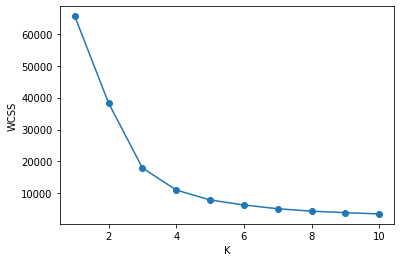

In [41]:
### Elbow Analysis to find number of clusters ###
n_clusters = range(1, 11)
cluster_sse = []
for i in n_clusters:
    kmeans = KMeans(n_clusters= i)
    kmeans.fit(df_rfm.iloc[:, [1, 2, 4]])
    cluster_sse.append(kmeans.inertia_)
    
plt.plot(n_clusters, cluster_sse, marker = "o")
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

From the above plot we can see that the elbow shape is forming at the point where cluster number is between 3-4. so it's safe to have the cluster number at 4.
Now let's use that value into the algorithm to segment our users based on Recency, purchase count and total purchase value. 

In [42]:
#Let's segment into clusters using k-means algorithm
km_cluster = KMeans(n_clusters = 4, random_state= 22)
df_rfm['CLUSTER'] = km_cluster.fit_predict(df_rfm.iloc[:,[1,2,4]])

In [43]:
df_rfm.head()

,USER_ID,PURCHASE_COUNT,TOTAL_PURCHASES_EUR,LAST_PURCHASE_DAY,RECENCY,CLUSTER
0,1,-0.394539,-0.414641,2025-03-21,1.077517,1
1,2,-0.276420,-0.248398,2020-09-02,-1.092241,0
2,3,1.849732,2.315248,2020-05-25,-0.951621,3
3,4,-0.394539,-0.414641,2025-03-21,1.077517,1
4,5,-0.394539,-0.414641,2025-03-21,1.077517,1


Let's plot the datapoints with their clusters

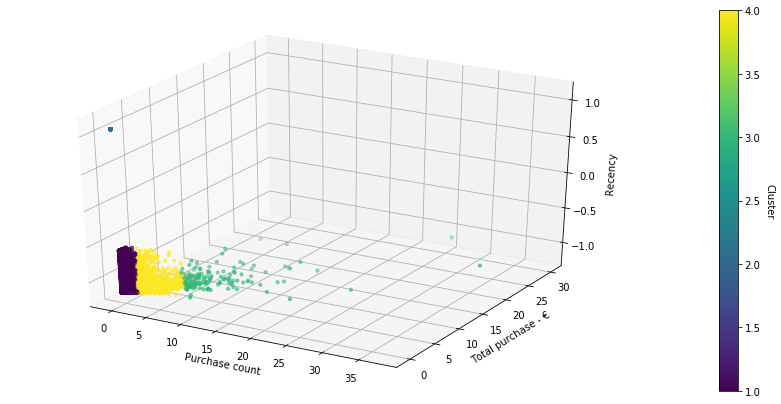

In [44]:
fig = plt.figure(figsize= (15, 7))
ax = fig.add_subplot(111, projection='3d')
graph = ax.scatter(xs = df_rfm['PURCHASE_COUNT'], ys = df_rfm['TOTAL_PURCHASES_EUR'], zs = df_rfm['RECENCY'], c= (df_rfm['CLUSTER'] + 1),zdir='z', s=10, depthshade=True)
ax.set_xlabel('Purchase count')
ax.set_ylabel('Total purchase - €')
ax.set_zlabel('Recency')
cb = fig.colorbar(graph, pad=0.1)
cb.set_label('Cluster', rotation= -90, va='bottom')
plt.show()

This 3-d graph shows that cluster 3 users are most valuable, since they have the lowest recency from their last purchase, and have the highest total purchase and purchase count. 

Let's explore how each user segment present in each of the RFM values.

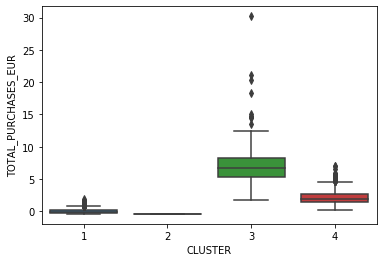

In [45]:
sns.boxplot(x=(df_rfm['CLUSTER'] + 1), y=df_rfm['TOTAL_PURCHASES_EUR'], data=df_rfm)



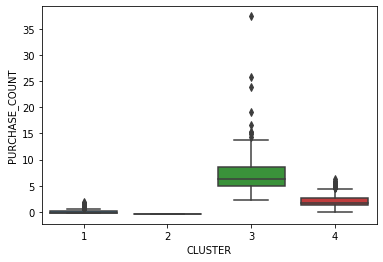

In [46]:
sns.boxplot(x=(df_rfm['CLUSTER'] + 1), y=df_rfm['PURCHASE_COUNT'], data=df_rfm)

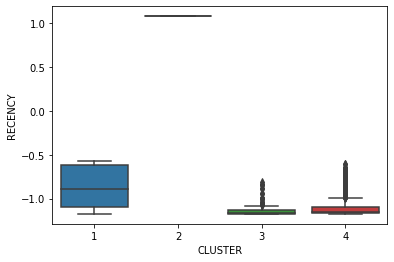

In [47]:
sns.boxplot(x=(df_rfm['CLUSTER'] + 1), y=df_rfm['RECENCY'], data=df_rfm)

### Aggregation of cluster information with main dataset.

In [48]:

df['CLUSTER'] = (df_rfm['CLUSTER'] + 1)   ### to account for cluster indices, as index starts from 0 in Python

In [49]:
df.head()

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,...,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE,RECENCY,CLUSTER
0,2019-09-01,DNK,0,0.0,0.0,2025-03-21,2025-03-21,1,0.0,0.0,...,NaN,False,0.0,0.0,0.0,0.0,0.000,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",1602,2
1,2019-09-01,FIN,1,1.0,0.0,2020-09-02,2020-09-02,2,0.0,1.0,...,NaN,False,23.0,2.0,0.0,0.0,6.853,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",59,1
2,2019-09-01,DNK,19,19.0,0.0,2019-12-10,2020-05-25,3,0.0,4.0,...,NaN,True,21.0,2.0,9.0,3.0,6.559,"{\n ""General merchandise"": 1,\n ""Grocery"": 9...",159,4
3,2019-09-01,FIN,0,0.0,0.0,2025-03-21,2025-03-21,4,0.0,0.0,...,NaN,False,0.0,0.0,0.0,0.0,0.000,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",1602,2
4,2019-09-01,GRC,0,0.0,0.0,2025-03-21,2025-03-21,5,0.0,0.0,...,NaN,False,0.0,0.0,0.0,0.0,0.000,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",1602,2


Let's form an informative table where we can have the user segments and their calculated mean of different features

In [50]:
round(df.iloc[:,].groupby('CLUSTER').mean(), 2)

,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,DINNER_PURCHASES,LATE_NIGHT_PURCHASES,TOTAL_PURCHASES_EUR,...,IOS_PURCHASES,WEB_PURCHASES,ANDROID_PURCHASES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,RECENCY
CLUSTER,,,,,,,,,,,,,,,,,,,,,
1,3.13,2.89,0.24,11034.64,0.10,1.14,0.27,1.62,0.0,91.44,...,1.49,0.53,1.11,0.57,11.47,4.01,45.93,40.72,5.99,217.74
2,0.00,0.00,0.00,10938.68,0.00,0.00,0.00,0.00,0.0,0.00,...,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,1602.00
3,67.00,64.95,2.05,11223.73,2.78,30.79,4.68,28.59,0.0,1823.40,...,29.03,14.66,23.31,0.79,11.33,3.99,6.68,3.94,5.77,29.64
4,20.34,19.25,1.09,11104.20,0.58,7.96,1.59,10.13,0.0,584.39,...,9.84,3.27,7.23,0.70,11.70,4.02,20.62,12.29,5.84,49.98


From the table above and the box plot we can see some valuable information!
- As said earlier, the 3rd cluster/segment of users are standing out as the top users of the service, the mean purchase count and total purchase value is much higher than any other cluster, while there has not been much time gone from their last purchase.
- Apart from the users who has not purchased at all (cluster 2), cluster 1 is the least performing group, their purchase count and total purchase value is lower than cluster number 3 and 4.
- Most common purchases of cluster number 3 and 4 falls between lunch and dinner purchases


We have successfully been able to segment the users of the service based on their Recency, frequency and monetary purchase behaviou, by utilizing k-mean ML clustering algorithm. 